### Import from Kaggle

In [ ]:
import sys
! pip install -q kaggle
from google.colab import files
files.upload() #upload kaggle.json generate from your account
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c cropharvest-crop-detection

Saving kaggle.json to kaggle.json
 90% 105M/117M [00:01<00:00, 48.6MB/s] 
100% 117M/117M [00:01<00:00, 67.6MB/s]
  0% 0.00/2.21M [00:00<?, ?B/s]
100% 2.21M/2.21M [00:00<00:00, 74.0MB/s]


In [ ]:
! unzip test_nolabels.csv.zip test_nolabels.csv
! unzip train.csv.zip train.csv

Archive:  test_nolabels.csv.zip
  inflating: test_nolabels.csv       
Archive:  train.csv.zip
  inflating: train.csv               


## Preprocess

In [ ]:
#Preparation des donnees
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
import multiprocessing
cores = multiprocessing.cpu_count()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline

np.random.seed(45)

# Algorithme Machine Learning
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier
 
 # les metriques 
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Pretraitements








In [27]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test_nolabels.csv')
test_data.head(5)

,S.No,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,S2_B12_jan,S1_VV_jan,S1_VH_jan,ERA5_temperature_2m_jan,ERA5_total_precipitation_jan,topo_elevation_jan,topo_slope_jan,NDVI_jan,S2_B2_feb,S2_B3_feb,S2_B4_feb,S2_B5_feb,S2_B6_feb,S2_B7_feb,S2_B8_feb,S2_B8A_feb,S2_B9_feb,S2_B11_feb,S2_B12_feb,S1_VV_feb,S1_VH_feb,ERA5_temperature_2m_feb,ERA5_total_precipitation_feb,topo_elevation_feb,topo_slope_feb,NDVI_feb,S2_B2_mar,S2_B3_mar,S2_B4_mar,...,ERA5_total_precipitation_oct,topo_elevation_oct,topo_slope_oct,NDVI_oct,S2_B2_nov,S2_B3_nov,S2_B4_nov,S2_B5_nov,S2_B6_nov,S2_B7_nov,S2_B8_nov,S2_B8A_nov,S2_B9_nov,S2_B11_nov,S2_B12_nov,S1_VV_nov,S1_VH_nov,ERA5_temperature_2m_nov,ERA5_total_precipitation_nov,topo_elevation_nov,topo_slope_nov,NDVI_nov,S2_B2_dec,S2_B3_dec,S2_B4_dec,S2_B5_dec,S2_B6_dec,S2_B7_dec,S2_B8_dec,S2_B8A_dec,S2_B9_dec,S2_B11_dec,S2_B12_dec,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec
0,0,-17.649477,-24.327178,1111.603354,1190.158872,1361.861147,1436.238138,1350.277481,1382.111848,1419.716749,1410.456550,791.939153,1544.845749,954.418168,290.150951,-0.000014,320.552335,0.907441,0.090289,-17.090842,-31.772597,1494.089651,1310.167001,1471.223227,1727.377971,1557.460054,2079.405879,1872.317204,2209.610624,446.378354,2387.852010,1496.711254,318.351112,0.000239,284.120689,1.126154,0.127578,-17.328101,-26.790417,2341.333406,...,0.000057,338.038820,0.947951,0.079908,-16.683532,-26.353509,820.269397,621.081339,574.337359,532.195309,491.053353,556.117036,449.004636,585.462245,909.720871,651.937939,482.306406,292.225523,-0.000129,265.256953,1.155948,-0.118161,-18.158991,-32.178988,955.984617,1071.836061,864.854320,802.212518,929.409800,983.274904,777.782928,966.513644,467.731680,1045.355257,633.790963,296.952437,0.000092,276.466775,0.765980,0.000600
1,1,-14.559686,-19.936119,1764.795592,1856.603435,2156.740323,2633.317506,2731.894209,2878.742338,2621.323845,3201.553256,653.528138,3813.330232,2619.750610,290.769787,0.000277,228.182568,2.825683,0.224964,-14.098418,-21.872780,1379.575560,1109.498228,1249.058309,1512.309992,1588.693324,2272.925625,2039.929984,2556.545263,279.258159,3360.289686,2261.055792,315.500167,0.003192,192.126606,2.886615,0.239924,-14.720192,-20.933328,1497.123114,...,0.001278,237.317837,2.729996,0.451665,-9.539860,-14.687268,1130.693975,1005.945290,975.491411,1212.845614,1845.339785,2470.270542,2273.930878,2681.168407,624.873649,2374.795765,1423.816872,293.877027,-0.000032,174.896618,3.001843,0.395926,-12.003004,-15.907136,1449.036137,1499.111009,1406.431562,1419.825821,1976.273983,2110.880967,2026.702042,2292.479225,791.909589,2902.059945,1728.924349,298.468523,0.000139,187.130317,2.598537,0.217297
2,2,-14.208844,-21.404320,1210.320260,1246.028476,1523.531488,1706.652761,2014.364032,2198.544215,2277.422666,2547.302707,493.607303,3180.495470,1993.207870,290.758535,0.000193,370.585959,0.899931,0.279854,-12.988959,-19.602587,1290.396444,1030.335318,1091.917269,1399.452537,1618.089344,2313.608754,2176.693786,2625.514197,259.243765,2788.327927,1602.841871,315.668946,0.001630,333.950817,1.119261,0.278538,-9.789744,-17.073523,1251.713146,...,0.000276,392.596019,0.940974,0.422171,-12.628563,-19.290682,1139.424667,1063.674883,1069.126878,1311.602841,2152.553755,2921.106924,2645.276184,3101.293538,723.809135,2996.171738,1901.663436,293.381766,-0.000124,314.202135,1.148721,0.447757,-11.980708,-20.019002,1425.459868,1529.781735,1454.750721,1473.809798,2082.446821,2214.546398,2103.697056,2369.819453,893.709359,3217.008133,2158.612101,298.045025,0.000104,324.857357,0.758805,0.230539
3,3,-13.895412,-21.169488,1550.755198,1541.339240,1732.355678,1828.669115,1876.796177,2001.004560,1996.979443,2212.820792,536.626943,2766.871496,1886.968014,290.612265,0.000492,225.296013,1.291606,0.142753,-13.732596,-25.613399,1645.086108,1296.359517,1424.261537,1728.442664,1697.091146,2316.907386,2092.373246,2531.465651,4

In [28]:
train_data.dropna(axis=0,inplace=True)
train_data.shape

(62000, 218)

In [ ]:
train_feature = train_data[['S2_B3_jan','ERA5_temperature_2m_jan','ERA5_total_precipitation_jan',
 'topo_elevation_jan','S2_B3_feb','ERA5_temperature_2m_feb',
 'ERA5_total_precipitation_feb','topo_elevation_feb','topo_slope_feb',
 'S2_B3_mar','ERA5_temperature_2m_mar','ERA5_total_precipitation_mar',
 'topo_elevation_mar','ERA5_temperature_2m_apr',
 'ERA5_total_precipitation_apr','topo_elevation_apr','topo_slope_apr',
 'ERA5_temperature_2m_may','ERA5_total_precipitation_may',
 'topo_elevation_may','S2_B12_jun','ERA5_temperature_2m_jun',
 'ERA5_total_precipitation_jun','topo_elevation_jun',
 'ERA5_temperature_2m_jul','ERA5_total_precipitation_jul',
 'topo_elevation_jul','topo_slope_jul','S1_VH_aug',
 'ERA5_temperature_2m_aug','ERA5_total_precipitation_aug',
 'topo_elevation_aug','topo_slope_aug','S2_B2_sep',
 'ERA5_temperature_2m_sep','ERA5_total_precipitation_sep',
 'topo_elevation_sep','topo_slope_sep','S2_B2_oct','ERA5_temperature_2m_oct',
 'ERA5_total_precipitation_oct','topo_elevation_oct','topo_slope_oct','ERA5_temperature_2m_nov',
 'ERA5_total_precipitation_nov','topo_elevation_nov','ERA5_temperature_2m_dec','ERA5_total_precipitation_dec',
 'topo_elevation_dec','topo_slope_dec']]

test_feature = test_data[['S2_B3_jan','ERA5_temperature_2m_jan','ERA5_total_precipitation_jan',
 'topo_elevation_jan','S2_B3_feb','ERA5_temperature_2m_feb',
 'ERA5_total_precipitation_feb','topo_elevation_feb','topo_slope_feb',
 'S2_B3_mar','ERA5_temperature_2m_mar','ERA5_total_precipitation_mar',
 'topo_elevation_mar','ERA5_temperature_2m_apr',
 'ERA5_total_precipitation_apr','topo_elevation_apr','topo_slope_apr',
 'ERA5_temperature_2m_may','ERA5_total_precipitation_may',
 'topo_elevation_may','S2_B12_jun','ERA5_temperature_2m_jun',
 'ERA5_total_precipitation_jun','topo_elevation_jun',
 'ERA5_temperature_2m_jul','ERA5_total_precipitation_jul',
 'topo_elevation_jul','topo_slope_jul','S1_VH_aug',
 'ERA5_temperature_2m_aug','ERA5_total_precipitation_aug',
 'topo_elevation_aug','topo_slope_aug','S2_B2_sep',
 'ERA5_temperature_2m_sep','ERA5_total_precipitation_sep',
 'topo_elevation_sep','topo_slope_sep','S2_B2_oct','ERA5_temperature_2m_oct',
 'ERA5_total_precipitation_oct','topo_elevation_oct','topo_slope_oct','ERA5_temperature_2m_nov',
 'ERA5_total_precipitation_nov','topo_elevation_nov','ERA5_temperature_2m_dec','ERA5_total_precipitation_dec',
 'topo_elevation_dec','topo_slope_dec']]

In [ ]:
#train_feature = train_data.loc[:, ~train_data.columns.isin(['LABELS', 'Unnamed: 0'])]
test_label = train_data['LABELS']
Y_train_all = test_label.astype(int)

#pour normaliser les données 
preprocess = preprocessing.PowerTransformer()

X_train_all = train_feature#.to_numpy()

#normaliser les donnees de test
test_no = test_data['S.No']
#test_feature = test_data.loc[:, ~test_data.columns.isin(['S.No'])]
X_test = test_feature#.to_numpy()
X_test.shape , X_train_all.shape 

((1200, 50), (62000, 50))

# HyperParameter Tunnig

In [ ]:
result = pd.DataFrame(columns = ("Classificateurs","scores"))
classifier, scores = [],[]

In [ ]:
def Tunnig(name,clf,tuned_parameters):
  cv_strategy = StratifiedKFold(n_splits=10, shuffle=True)
  metric = 'f1'
  search = GridSearchCV(clf, tuned_parameters, scoring=metric, cv=cv_strategy, return_train_score=True)
  pipe = make_pipeline(preprocessing.StandardScaler(), search)
  pipe.fit(X_train_all, Y_train_all)
  classifier.append(name)
  scores.append(pipe.best_score_)
  return pipe.best_params_, pipe.best_score_

#Pipeline

In [ ]:
def Pipelinning(name,classi):
  pipe = make_pipeline(preprocess, classi)
  score = cross_val_score(pipe, X_train_all, Y_train_all,cv=50, n_jobs=cores, scoring='f1')
  classifier.append(name)
  scores.append(score.mean())
  return score.mean()


# Classifiers

### Random Forest

In [ ]:
parameter_rand_forest = {
      'bootstrap': [True, False],
      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
      'criterion' : ['gini','entropy'],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [100,200,300,400,500,600,700,800]}
rand_forest = RandomForestClassifier(n_estimators = 450)

print(Pipelinning("RandomForestClassifier",rand_forest))

selector = SelectFromModel(estimator=rand_forest).fit(X_train_all, Y_train_all)

#print(selector.get_feature_names_out())
#Tunnig("RandomForestClassifier",rand_forest,parameter_rand_forest)

0.8855619251210962


In [ ]:
train_data = train_data[selector.get_feature_names_out()]
print(train_data)

### Multi-Layer Perceptron

In [ ]:
parameter_MLP = {
    'hidden_layer_sizes': [(100,100,100,100,100),(300, 300, 300),(500,500),(1000)],
    'alpha': [0.1,0.01,1],}

MLP = MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300, 300, 300),
                    activation='tanh',
                    solver='adam',
                    alpha=0.1, 
                    learning_rate='adaptive', max_iter=1000,early_stopping=True)

print(Pipelinning("Multi-Layer Perceptron",MLP))

Tunnig("Multi-Layer Perceptron",MLP,parameter_MLP)

0.8640894784289943


### Adaboost Classifier

In [ ]:
traparameter_ada ={
    'n_estimators':[10,20,50,100,200,400,500,600,700,800,1000],
    'learning_rate':[1,2,5,10,20]}

clf_ada = AdaBoostClassifier(n_estimators = 300,learning_rate = 1)

print(Pipelinning("Adaboost Classifier", clf_ada))

Tunnig("Adaboost",clf_ada,traparameter_ada)

### Voting Classifier

In [ ]:
clf_vote = VotingClassifier(
    estimators=[
        ('MLP', MLP), # MLP
        ('Rand_forest', rand_forest), # Decision Tree
        ('adaboost', clf_ada) #adaboost
        ],
    voting='soft')

print(Pipelinning("Voting classifier", clf_vote))


### Predictions 

In [ ]:
for i,text in enumerate(classifier):
    result.loc[i+1] = [text,np.around(scores[i]*100, decimals = 1)]
result

# Fichier de soumission Kaggle/Submission file for Kaggle

In [ ]:
def soumission (best_classi):
  cl = make_pipeline(preprocessing.StandardScaler(), best_classi)
  cl.fit(X_train_all, Y_train_all)
  prediction = cl.predict(X_test)
  with open('prediction.csv','w') as file:
    for num,pred in zip(test_no,prediction):
      writer = csv.writer(file)
      if num ==0:
        writer.writerow(['S.No','LABELS'])
      writer.writerow([num,pred])
  print("soubmission file created")
soumission(rand_forest)

soubmission file created


In [ ]:
! kaggle competitions submit -c cropharvest-crop-detection -f prediction.csv -m "rand forest with stratifiedkfold, and entropy"

100% 8.30k/8.30k [00:01<00:00, 8.30kB/s]
Successfully submitted to CropHarvest - crop vs. non-crop

# Save models to pickle

In [ ]:
# save model 
import pickle
# save the classifiers
#classif_list = [rand_forest,MLP,clf_ada,clf_vote]
classif_list = [rand_forest]
for c in classif_list:
  with open(f'c'+'.pkl', 'wb') as fid:
      pickle.dump(c, fid)    

# load them again
#classif_list = [rand_forest,MLP,clf_ada,clf_vote]
classif_list = [rand_forest]
new_class = []
for c in classif_list:
  with open(f'c'+'.pkl', 'rb') as fid:
      new_class.append(pickle.load(fid))

# Plot learning curve

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


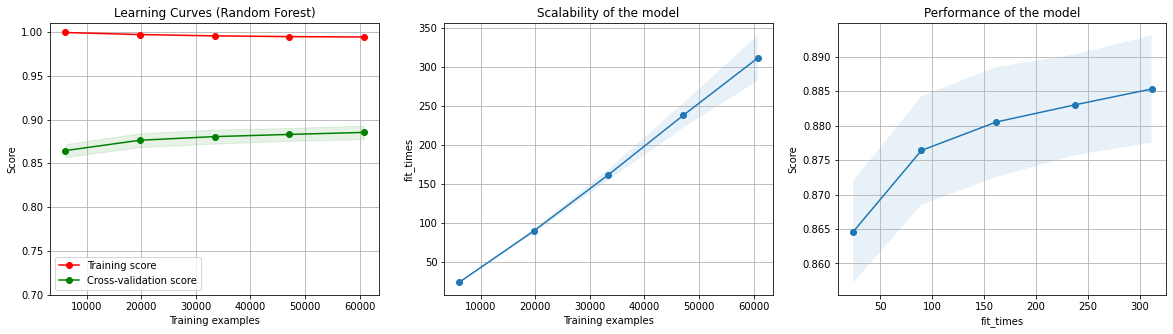

In [ ]:
"""
========================
Plotting Learning Curves
========================
In the first column, first row the learning curve of a naive Bayes classifier
is shown for the digits dataset. Note that the training score and the
cross-validation score are both not very good at the end. However, the shape
of the curve can be found in more complex datasets very often: the training
score is very high at the beginning and decreases and the cross-validation
score is very low at the beginning and increases. In the second column, first
row we see the learning curve of an SVM with RBF kernel. We can see clearly
that the training score is still around the maximum and the validation score
could be increased with more training samples. The plots in the second row
show the times required by the models to train with various sizes of training
dataset. The plots in the third row show how much time was required to train
the models for each training sizes.

"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring="f1",
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv =StratifiedKFold(n_splits=50, shuffle=True)

plot_learning_curve(rand_f, title, X_train_all, Y_train_all, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)


plt.show()


# Some EDA for the report

In [22]:
train_data.head(3)

,S2_B3_jan,ERA5_temperature_2m_jan,S2_B3_feb,ERA5_temperature_2m_feb,S2_B3_mar,ERA5_temperature_2m_mar,ERA5_total_precipitation_mar,ERA5_temperature_2m_apr,S2_B12_jun,S1_VH_aug,ERA5_temperature_2m_aug,ERA5_total_precipitation_aug,S2_B2_sep,ERA5_temperature_2m_sep,ERA5_total_precipitation_sep,S2_B2_oct,ERA5_temperature_2m_oct,ERA5_total_precipitation_oct,ERA5_temperature_2m_nov,ERA5_total_precipitation_nov,ERA5_temperature_2m_dec
0,-21.134172,281.709319,-25.591754,307.780824,-22.292052,267.254132,0.001306,307.701561,450.025705,729.640594,302.870588,0.010583,-12.494502,264.794056,0.004645,-12.381761,267.334481,0.000122,284.421910,-0.000055,289.382220
1,-14.744978,261.859364,-17.236362,285.216476,-17.430682,250.727601,0.004808,302.399765,874.295730,731.552057,306.579035,0.002833,-11.677634,259.803250,0.004304,-10.975587,253.731556,0.004012,267.866234,0.002012,266.578370
2,-17.026201,268.225405,-19.043943,293.552775,-19.967875,256.822235,0.001022,299.785139,624.109594,2868.567919,303.631801,0.000884,-11.846867,261.592503,0.004477,-10.097325,257.713996,0.004069,272.628444,0.003630,276.467873


In [23]:
test_data.head(3)

,S.No,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,S2_B12_jan,S1_VV_jan,S1_VH_jan,ERA5_temperature_2m_jan,ERA5_total_precipitation_jan,topo_elevation_jan,topo_slope_jan,NDVI_jan,S2_B2_feb,S2_B3_feb,S2_B4_feb,S2_B5_feb,S2_B6_feb,S2_B7_feb,S2_B8_feb,S2_B8A_feb,S2_B9_feb,S2_B11_feb,S2_B12_feb,S1_VV_feb,S1_VH_feb,ERA5_temperature_2m_feb,ERA5_total_precipitation_feb,topo_elevation_feb,topo_slope_feb,NDVI_feb,S2_B2_mar,S2_B3_mar,S2_B4_mar,...,ERA5_total_precipitation_oct,topo_elevation_oct,topo_slope_oct,NDVI_oct,S2_B2_nov,S2_B3_nov,S2_B4_nov,S2_B5_nov,S2_B6_nov,S2_B7_nov,S2_B8_nov,S2_B8A_nov,S2_B9_nov,S2_B11_nov,S2_B12_nov,S1_VV_nov,S1_VH_nov,ERA5_temperature_2m_nov,ERA5_total_precipitation_nov,topo_elevation_nov,topo_slope_nov,NDVI_nov,S2_B2_dec,S2_B3_dec,S2_B4_dec,S2_B5_dec,S2_B6_dec,S2_B7_dec,S2_B8_dec,S2_B8A_dec,S2_B9_dec,S2_B11_dec,S2_B12_dec,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec
0,0,-17.649477,-24.327178,1111.603354,1190.158872,1361.861147,1436.238138,1350.277481,1382.111848,1419.716749,1410.456550,791.939153,1544.845749,954.418168,290.150951,-0.000014,320.552335,0.907441,0.090289,-17.090842,-31.772597,1494.089651,1310.167001,1471.223227,1727.377971,1557.460054,2079.405879,1872.317204,2209.610624,446.378354,2387.852010,1496.711254,318.351112,0.000239,284.120689,1.126154,0.127578,-17.328101,-26.790417,2341.333406,...,0.000057,338.038820,0.947951,0.079908,-16.683532,-26.353509,820.269397,621.081339,574.337359,532.195309,491.053353,556.117036,449.004636,585.462245,909.720871,651.937939,482.306406,292.225523,-0.000129,265.256953,1.155948,-0.118161,-18.158991,-32.178988,955.984617,1071.836061,864.854320,802.212518,929.409800,983.274904,777.782928,966.513644,467.731680,1045.355257,633.790963,296.952437,0.000092,276.466775,0.765980,0.000600
1,1,-14.559686,-19.936119,1764.795592,1856.603435,2156.740323,2633.317506,2731.894209,2878.742338,2621.323845,3201.553256,653.528138,3813.330232,2619.750610,290.769787,0.000277,228.182568,2.825683,0.224964,-14.098418,-21.872780,1379.575560,1109.498228,1249.058309,1512.309992,1588.693324,2272.925625,2039.929984,2556.545263,279.258159,3360.289686,2261.055792,315.500167,0.003192,192.126606,2.886615,0.239924,-14.720192,-20.933328,1497.123114,...,0.001278,237.317837,2.729996,0.451665,-9.539860,-14.687268,1130.693975,1005.945290,975.491411,1212.845614,1845.339785,2470.270542,2273.930878,2681.168407,624.873649,2374.795765,1423.816872,293.877027,-0.000032,174.896618,3.001843,0.395926,-12.003004,-15.907136,1449.036137,1499.111009,1406.431562,1419.825821,1976.273983,2110.880967,2026.702042,2292.479225,791.909589,2902.059945,1728.924349,298.468523,0.000139,187.130317,2.598537,0.217297
2,2,-14.208844,-21.404320,1210.320260,1246.028476,1523.531488,1706.652761,2014.364032,2198.544215,2277.422666,2547.302707,493.607303,3180.495470,1993.207870,290.758535,0.000193,370.585959,0.899931,0.279854,-12.988959,-19.602587,1290.396444,1030.335318,1091.917269,1399.452537,1618.089344,2313.608754,2176.693786,2625.514197,259.243765,2788.327927,1602.841871,315.668946,0.001630,333.950817,1.119261,0.278538,-9.789744,-17.073523,1251.713146,...,0.000276,392.596019,0.940974,0.422171,-12.628563,-19.290682,1139.424667,1063.674883,1069.126878,1311.602841,2152.553755,2921.106924,2645.276184,3101.293538,723.809135,2996.171738,1901.663436,293.381766,-0.000124,314.202135,1.148721,0.447757,-11.980708,-20.019002,1425.459868,1529.781735,1454.750721,1473.809798,2082.446821,2214.546398,2103.697056,2369.819453,893.709359,3217.008133,2158.612101,298.045025,0.000104,324.857357,0.758805,0.230539


## Histogram of selected features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07829c2890>,
      dtype=object)

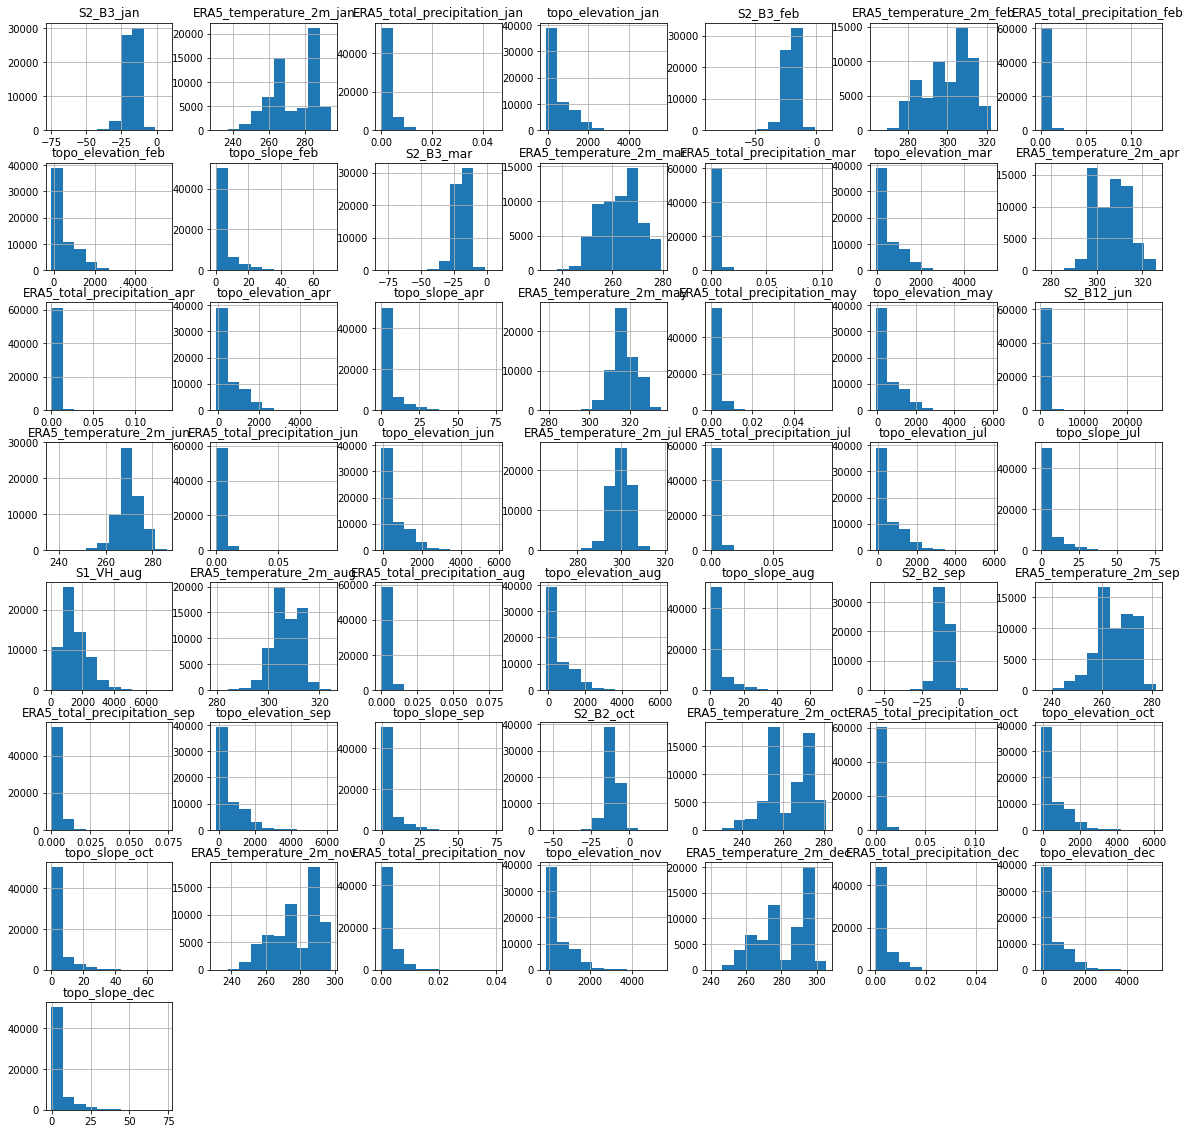

In [31]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
train_feature.hist(ax=ax)

## Correlation matrix

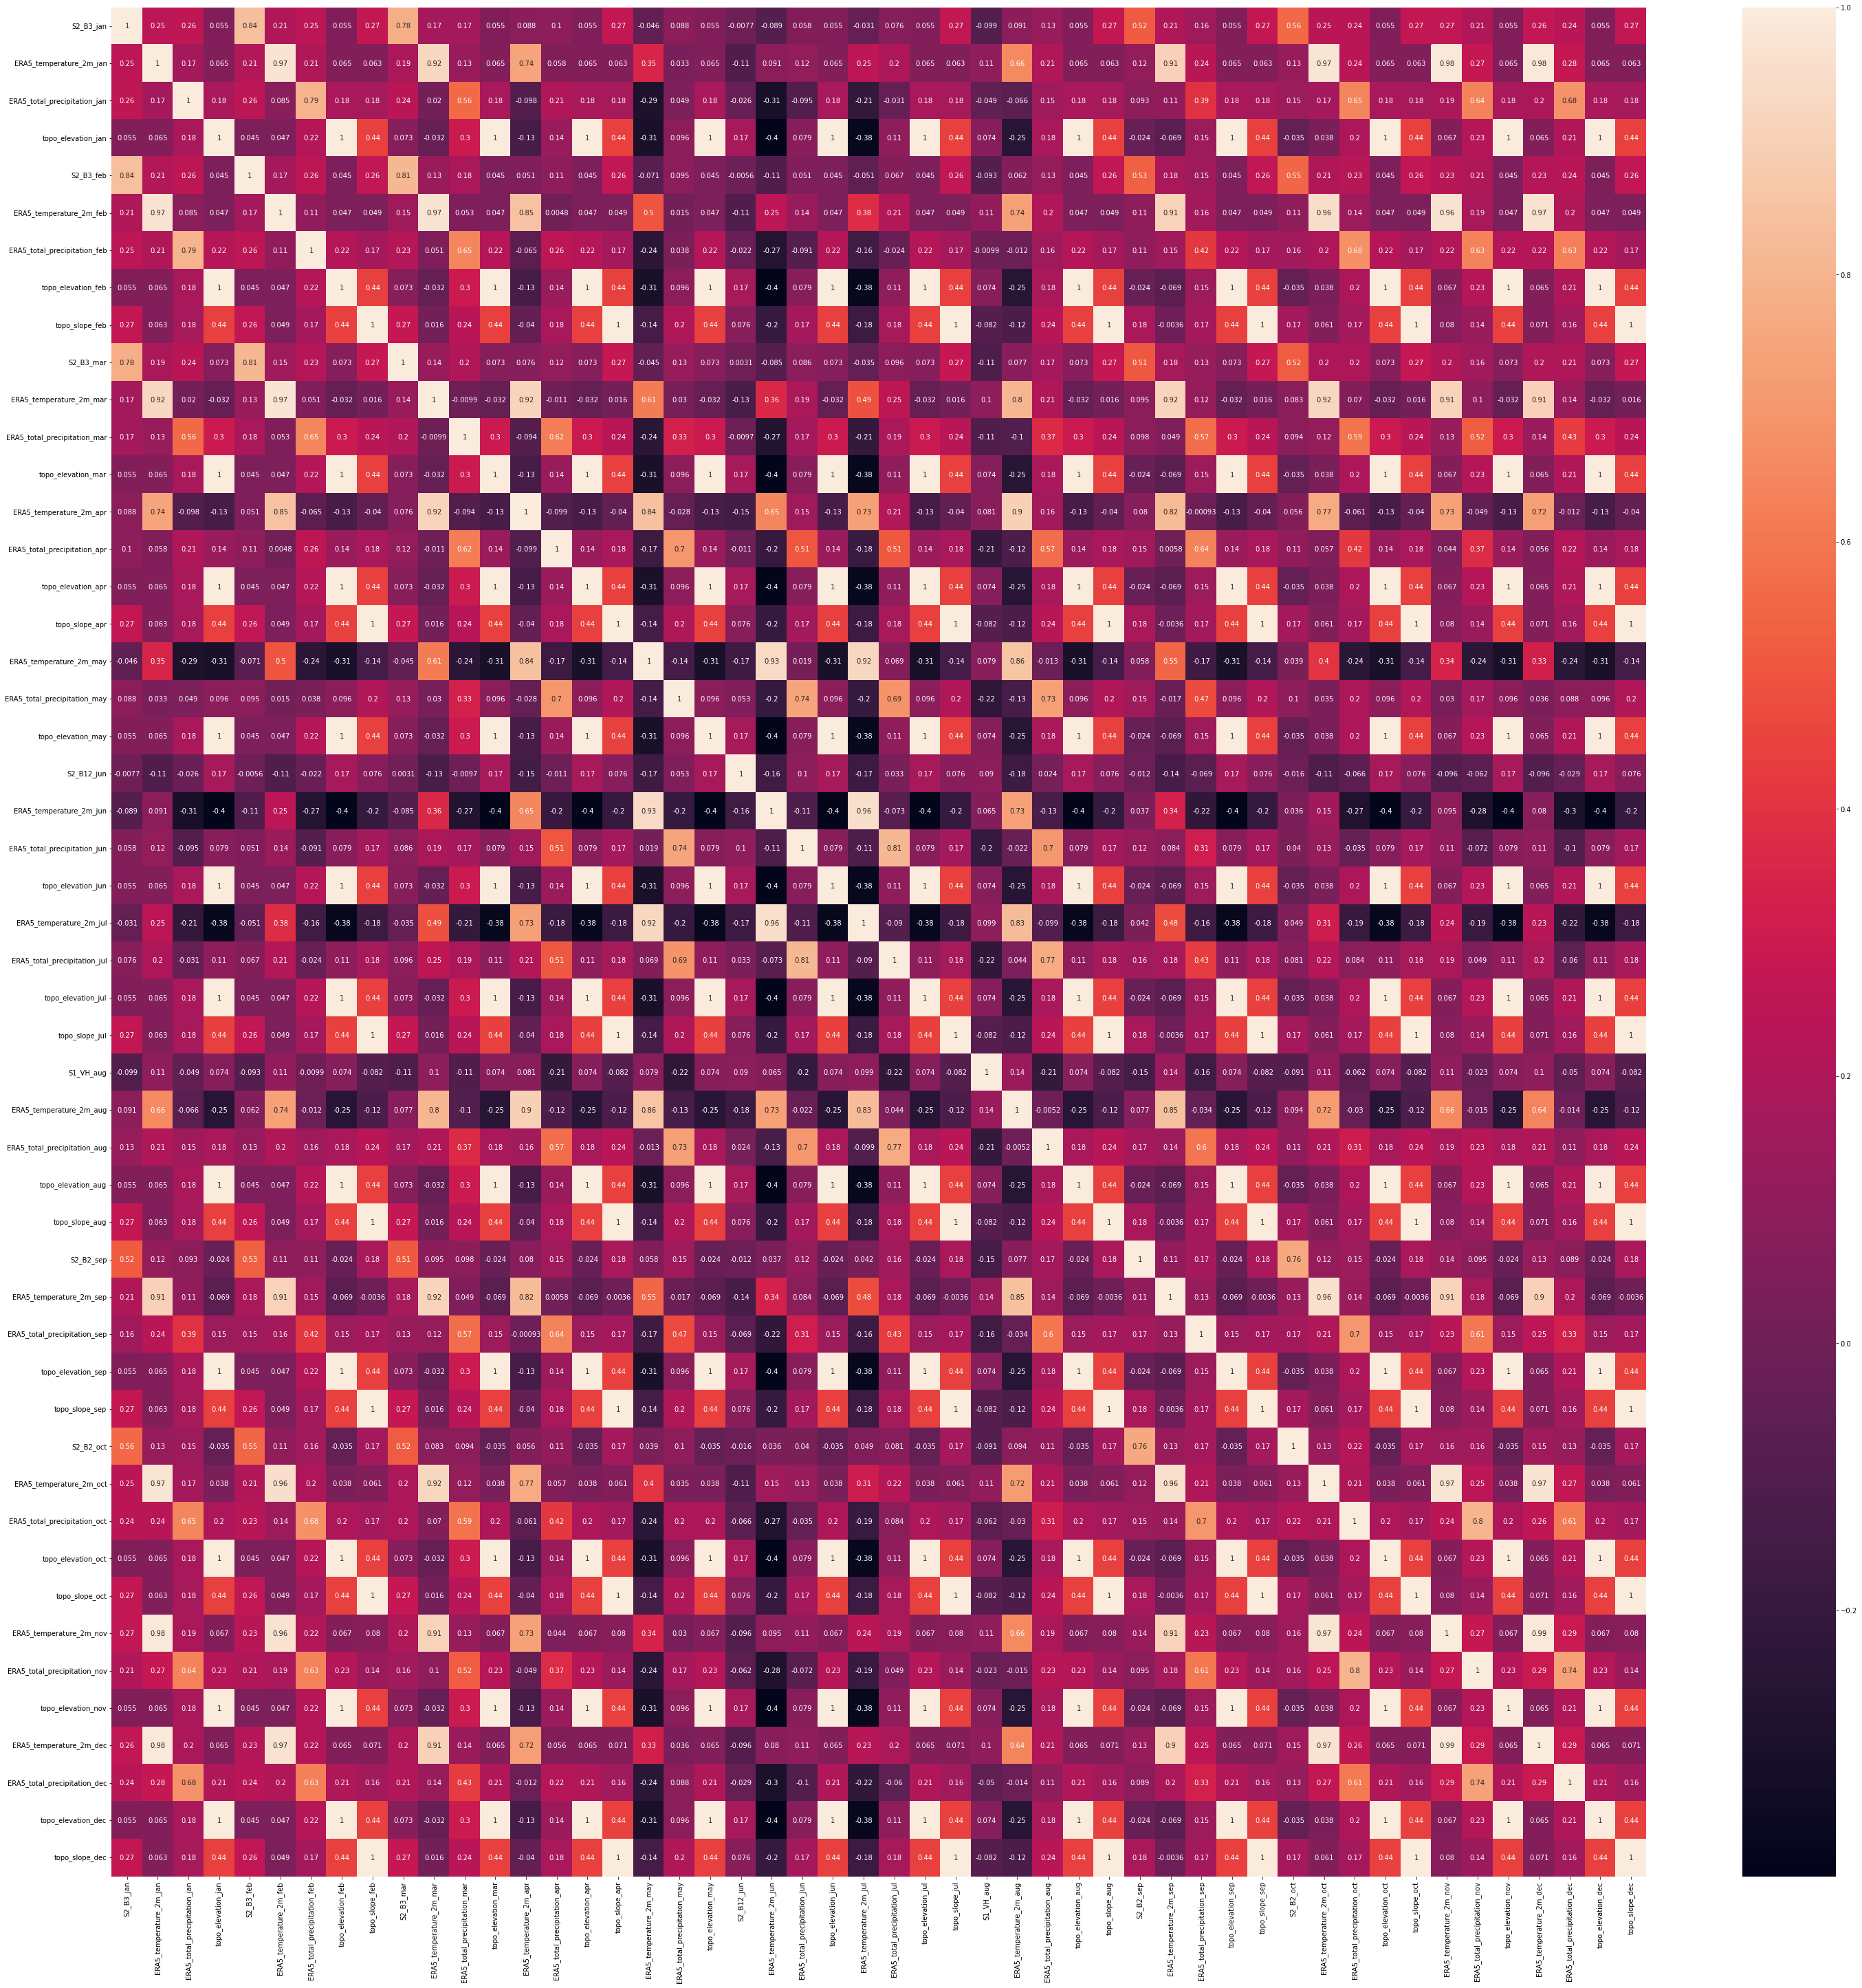

In [41]:
import seaborn as sn
fig = plt.figure(figsize = (50,50))
corrMatrix = train_feature.corr()
hm = sn.heatmap(corrMatrix, annot=True)
plt.show(hm)

In [44]:
fig = hm.get_figure()
fig.savefig("correlation_matrix_features.svg", format="svg")